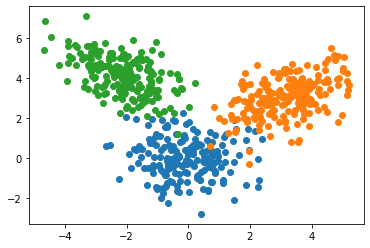

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

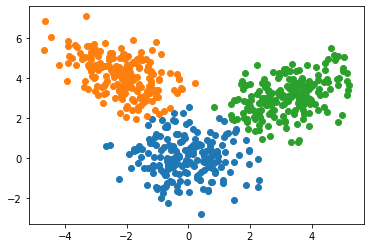

In [1]:
#ArdalanGerami


import math
import numpy as np
import matplotlib.pyplot as plt
import csv

with open('Image1.csv') as f:
    file = csv.reader(f)
    data = list(file)
data1 = data[1:]
data_sample = [[0 for i in range(2)] for k in range(600)]
for i in range(600):
    data_sample[i][0] = float(data1[i][1])
    data_sample[i][1] = float(data1[i][2])


def plot_Q1():
    x1_data = np.array([float(data_sample[i][0]) for i in range(0, 199)])
    y1_data = np.array([float(data_sample[i][1]) for i in range(0, 199)])
    x2_data = np.array([float(data_sample[i][0]) for i in range(200, 399)])
    y2_data = np.array([float(data_sample[i][1]) for i in range(200, 399)])
    x3_data = np.array([float(data_sample[i][0]) for i in range(400, 599)])
    y3_data = np.array([float(data_sample[i][1]) for i in range(400, 599)])
    plt.scatter(x1_data, y1_data)
    plt.scatter(x2_data, y2_data)
    plt.scatter(x3_data, y3_data)
    plt.show()
distributions = [[0 for i in range(3)] for j in range(3)]
distributions[0][0] = float(1 / 10)
distributions[0][1] = float(1 / 12)
distributions[1][0] = 0.11
distributions[1][1] = 0.13
distributions[2][0] = 0.14
distributions[2][1] = 0.17
distributions[0][2] = 0
distributions[1][2] = 0
distributions[2][2] = 0
len_cluster = [0 for i in range(3)]
def M_step(distirbutions):
    avg = average(distributions)
    distributions[0][0] = avg[0]
    distributions[0][1] = avg[1]
    distributions[1][0] = avg[2]
    distributions[1][1] = avg[3]
    distributions[2][0] = avg[4]
    distributions[2][1] = avg[5]
    sigma = variance(distributions)
    distributions[0][2] = sigma[0]
    distributions[1][2] = sigma[1]
    distributions[2][2] = sigma[2]
    return distributions
def clustering(distributions):
    len = len_clusters(distributions)
    R = E_step(distributions)
    cluster1 = [[0 for i in range(2)] for j in range(len[0])]
    cluster2 = [[0 for i in range(2)] for j in range(len[1])]
    cluster3 = [[0 for i in range(2)] for j in range(len[2])]
    f = 0
    k = 0
    s = 0
    for i in range(600):
        if R[0][i] == 1:
            cluster1[f][0] = data_sample[i][0]
            cluster1[f][1] = data_sample[i][1]
            f += 1
        elif R[1][i] == 1:
            cluster2[k][0] = data_sample[i][0]
            cluster2[k][1] = data_sample[i][1]
            k += 1
        elif R[2][i] == 1:
            cluster3[s][0] = data_sample[i][0]
            cluster3[s][1] = data_sample[i][1]
            s += 1
    cluster = [cluster1, cluster2, cluster3]
    return cluster
def average(distributions):
    cluster = clustering(distributions)
    cluster1 = cluster[0]
    cluster2 = cluster[1]
    cluster3 = cluster[2]
    X_cluster1 = [cluster1[i][0] for i in range(len(cluster1))]
    Y_cluster1 = [cluster1[i][1] for i in range(len(cluster1))]
    X_cluster2 = [cluster2[i][0] for i in range(len(cluster2))]
    Y_cluster2 = [cluster2[i][1] for i in range(len(cluster2))]
    X_cluster3 = [cluster3[i][0] for i in range(len(cluster3))]
    Y_cluster3 = [cluster3[i][1] for i in range(len(cluster3))]
    avg_X1 = np.mean(X_cluster1)
    avg_Y1 = np.mean(Y_cluster1)
    avg_X2 = np.mean(X_cluster2)
    avg_Y2 = np.mean(Y_cluster2)
    avg_X3 = np.mean(X_cluster3)
    avg_Y3 = np.mean(Y_cluster3)
    avg = [avg_X1, avg_Y1, avg_X2, avg_Y2, avg_X3, avg_Y3]
    return avg
def variance(distributions):
    cluster = clustering(distributions)
    cluster1 = cluster[0]
    cluster2 = cluster[1]
    cluster3 = cluster[2]
    X_cluster1 = [cluster1[i][0] for i in range(len(cluster1))]
    Y_cluster1 = [cluster1[i][1] for i in range(len(cluster1))]
    X_cluster2 = [cluster2[i][0] for i in range(len(cluster2))]
    Y_cluster2 = [cluster2[i][1] for i in range(len(cluster2))]
    X_cluster3 = [cluster3[i][0] for i in range(len(cluster3))]
    Y_cluster3 = [cluster3[i][1] for i in range(len(cluster3))]
    COV_XY_1 = np.cov(X_cluster1, Y_cluster1)
    COV_XY_2 = np.cov(X_cluster2, Y_cluster2)
    COV_XY_3 = np.cov(X_cluster3, Y_cluster3)
    sigma = [COV_XY_1, COV_XY_2, COV_XY_3]
    return sigma
def len_clusters(distributions):
    len_cluster = [0 for i in range(3)]
    R = E_step(distributions)
    for i in range(600):
        if R[0][i] == 1:
            len_cluster[0] += 1
        elif R[1][i] == 1:
            len_cluster[1] += 1
        elif R[2][i] == 1:
            len_cluster[2] += 1
    return len_cluster
def E_step(distributions):
    R = [[0 for i in range(600)] for j in range(3)]
    ED = [0 for i in range(3)]
    for i in range(600):
        for j in range(3):
            ED[j] = math.sqrt(
                ((data_sample[i][0] - distributions[j][0]) ** 2) + (data_sample[i][1] - distributions[j][1]) ** 2)
        if ED[0] < ED[1] and ED[0] < ED[2]:
            R[0][i] = 1
        elif ED[1] < ED[0] and ED[1] < ED[2]:
            R[1][i] = 1
        elif ED[2] < ED[0] and ED[2] < ED[1]:
            R[2][i] = 1
    return R
def plot_scatter(distributions):
    clusters = clustering(distributions)
    cluster1 = clusters[0]
    cluster2 = clusters[1]
    cluster3 = clusters[2]
    X_cluster1 = [cluster1[i][0] for i in range(len(cluster1))]
    Y_cluster1 = [cluster1[i][1] for i in range(len(cluster1))]
    X_cluster2 = [cluster2[i][0] for i in range(len(cluster2))]
    Y_cluster2 = [cluster2[i][1] for i in range(len(cluster2))]
    X_cluster3 = [cluster3[i][0] for i in range(len(cluster3))]
    Y_cluster3 = [cluster3[i][1] for i in range(len(cluster3))]
    plt.scatter(X_cluster1, Y_cluster1)
    plt.scatter(X_cluster2, Y_cluster2)
    plt.scatter(X_cluster3, Y_cluster3)
    plt.show()
def EM_algorithm():
    listt = [[0 for i in range(3)] for j in range(3)]
    for i in range(20):
        if i == 0:
            R1 = [0 for i in range(600)]
            R = E_step(distributions)
            for j in range(3):
                R1[j] = R[j][0:]
                print(R1[j])
        listt = M_step(distributions)
        distributions[0][0] = listt[0][0]
        distributions[0][1] = listt[0][1]
        distributions[0][2] = listt[0][2]
        distributions[1][0] = listt[1][0]
        distributions[1][1] = listt[1][1]
        distributions[1][2] = listt[2][2]
        distributions[2][0] = listt[2][0]
        distributions[2][1] = listt[2][1]
        distributions[2][2] = listt[2][2]
    print('mean_distribution1 = (', distributions[0][0], ', ', distributions[0][1], ')', '\n', 'sigma_distribution1 =',
          '\n',
          distributions[0][2], '\n')
    print('mean_distribution2 = (', distributions[1][0], ', ', distributions[1][1], ')', '\n', 'sigma_distribution2 =',
          '\n',
          distributions[1][2], '\n')
    print('mean_distribution3 = (', distributions[2][0], ', ', distributions[2][1], ')', '\n', 'sigma_distribution3 =',
          '\n',
          distributions[2][2], '\n')
plot_Q1()
EM_algorithm()
plot_scatter(distributions)